# **Disease Prediction using GuassianNB, Dicision Tree and Random Forest classifiers.**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## **Load data from .csv file**

In [ ]:
df1 = pd.read_csv('dataset.csv', skipinitialspace=True)
df1.columns = df1.columns.str.replace(' ', '')
df = df1.replace(np.nan, 'None', regex=True)

In [ ]:
df['Disease'] = df['Disease'].str.replace(' ', '_')
disease = df['Disease'].values
disease

array(['Fungal_infection', 'Fungal_infection', 'Fungal_infection', ...,
       'Urinary_tract_infection', 'Psoriasis', 'Impetigo'], dtype=object)

Extracting values from ech column, finding unique values, building the symptoms list, assigning the index value from symptom list to replace the symptom names in each column.

In [ ]:
symp = []

for x in range(1,18):
  globals()['s%s' % x] = df['Symptom_%s' % x].values
  unique, counts = np.unique(globals()['s%s' % x], return_counts=True)
  symp.extend(unique.tolist())

def unique(list1):
    x = np.array(list1)
    return np.unique(x)

k = unique(symp).tolist()
k

['None',
 'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic _patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_of urine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irre

In [ ]:
s1

array(['itching', 'skin_rash', 'itching', ..., 'burning_micturition',
       'skin_rash', 'skin_rash'], dtype=object)

In [ ]:
# Replacing symptoms names with index values from symptom list

for x in range(1, 18):
  for i in range(len(globals()['s%s' % x])):
    if globals()['s%s' % x][i] in k:
      globals()['s%s' % x][i] = k.index(globals()['s%s' % x][i])

In [ ]:
x = df.drop('Disease', axis=1)
y = df['Disease']

In [ ]:
x.shape

(4920, 17)

In [ ]:
x = np.column_stack((s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17))
y = disease

## Removing duplicates from Train and Test splits

In [ ]:
initial_number_of_data_points = len(x)


def get_unique(X_matrix, y_vector):
    Xy = list(set(list(zip([tuple(x) for x in X_matrix], y_vector))))
    X_matrix = [list(l[0]) for l in Xy]
    y_vector = [l[1] for l in Xy]
    return X_matrix, y_vector


x, y = get_unique(x, y)
data_points_removed = initial_number_of_data_points - len(x)
print("Number of duplicates removed:", data_points_removed )

Number of duplicates removed: 4616


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array(['Malaria', 'Malaria', 'Fungal_infection', 'hepatitis_A', 'Allergy',
       'Hepatitis_E', 'Hepatitis_E', 'Impetigo', 'Impetigo',
       'Hepatitis_E', 'Allergy', 'Tuberculosis', 'Jaundice',
       'Hepatitis_B', 'Jaundice', 'hepatitis_A', 'Diabetes_',
       'Chicken_pox', 'Pneumonia', 'Allergy', 'GERD',
       '(vertigo)_Paroymsal__Positional_Vertigo', 'Hypoglycemia',
       'Chicken_pox', 'Paralysis_(brain_hemorrhage)',
       '(vertigo)_Paroymsal__Positional_Vertigo', 'Varicose_veins',
       'Hepatitis_E', 'Peptic_ulcer_diseae', 'Fungal_infection',
       'Common_Cold', 'Malaria', 'Fungal_infection',
       'Alcoholic_hepatitis', 'Peptic_ulcer_diseae', 'GERD',
       'Paralysis_(brain_hemorrhage)', 'Pneumonia', 'Jaundice',
       'Alcoholic_hepatitis', 'Hepatitis_D', 'Malaria',
       'Fungal_infection', 'Hypoglycemia', 'Malaria', 'Malaria',
       'Peptic_ulcer_diseae', 'Chronic_cholestasis', 'Chicken_pox',
       'Allergy', 'hepatitis_A', 'Cervical_spondylosis', 'Jaundice'

In [ ]:
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred)*100)

GaussianNB Accuracy: 56.57894736842105


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', random_state=0 )

# Train Decision Tree Classifer
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
#print(y_pred)
print("Decision Tree classifer Accuracy:", accuracy_score(y_test, y_pred)*100)

Decision Tree classifer Accuracy: 67.10526315789474


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
result = rfc.predict(x_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, result)*100)

Random Forest Classifier Accuracy: 93.42105263157895


In [ ]:
print(classification_report(y_test, result))

                                         precision    recall  f1-score   support

(vertigo)_Paroymsal__Positional_Vertigo       1.00      1.00      1.00         2
                                   AIDS       1.00      1.00      1.00         1
                    Alcoholic_hepatitis       1.00      1.00      1.00         4
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial_Asthma       1.00      1.00      1.00         1
                   Cervical_spondylosis       1.00      1.00      1.00         1
                            Chicken_pox       1.00      1.00      1.00         4
                    Chronic_cholestasis       1.00      1.00      1.00         1
                            Common_Cold       1.00      1.00      1.00         1
                                 Dengue       1.00      1.00      1.00         1
                              Diabetes_       1.00      1.00      1.00         1
                          D

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]


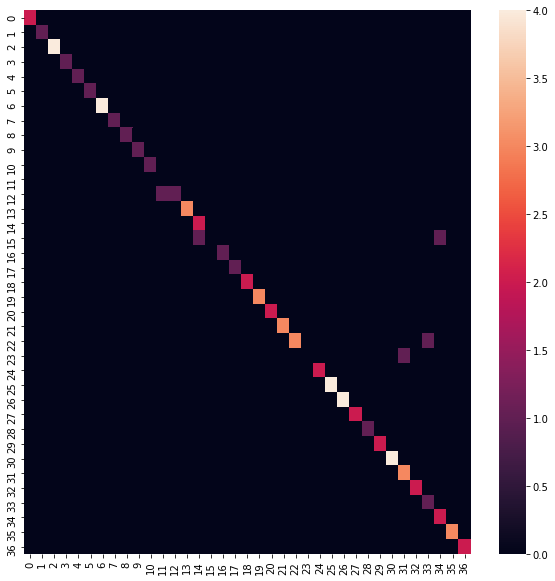

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = result), ax = ax)